In [1]:
import pandas as pd
import zipfile

# Chemin vers l'archive zip
zip_path = "archive.zip"  # adapte le nom si nécessaire

# Ouvrir l'archive zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Lister les fichiers contenus dans l'archive
    print(zip_ref.namelist())
    
    # Lire train.csv
    with zip_ref.open('train.csv') as train_file:
        train_df = pd.read_csv(train_file)
    
    # Lire test.csv
    with zip_ref.open('test.csv') as test_file:
        test_df = pd.read_csv(test_file)

# Aperçu des données
print("Train dataset:")
print(train_df.head())

print("\nTest dataset:")
print(test_df.head())


['test.csv', 'train.csv']
Train dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

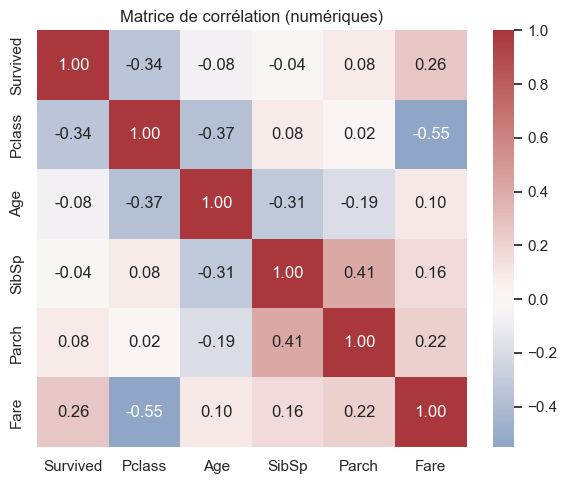

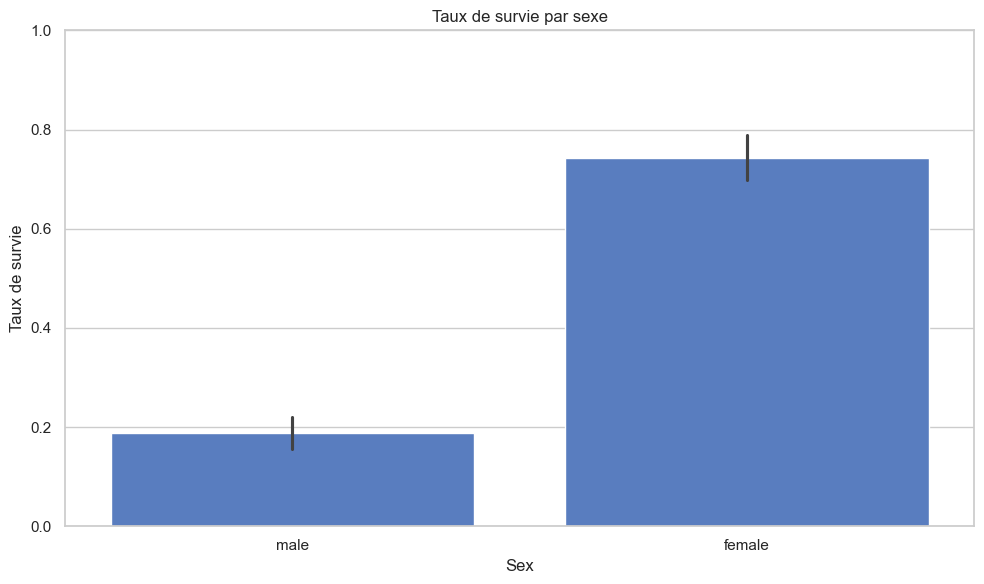

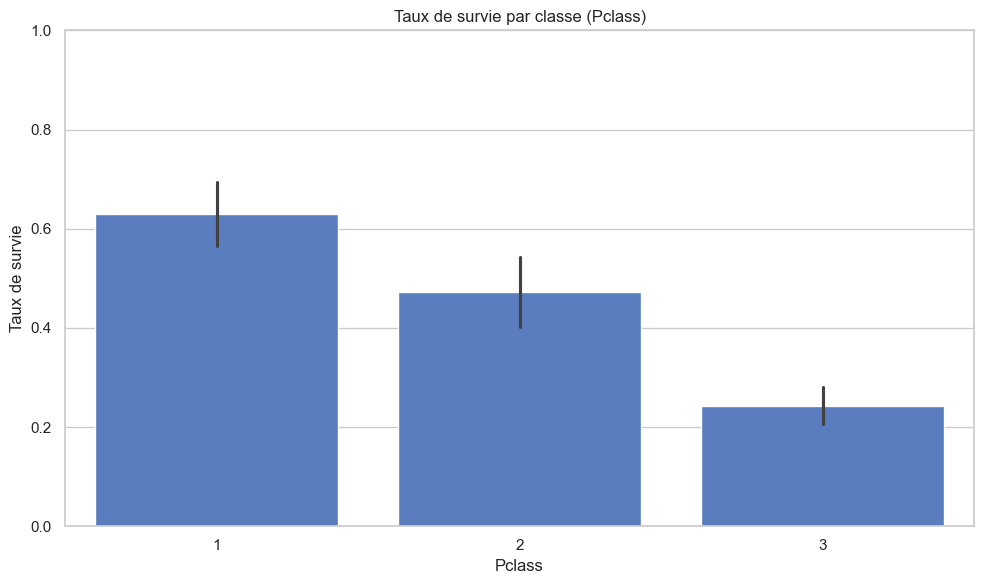

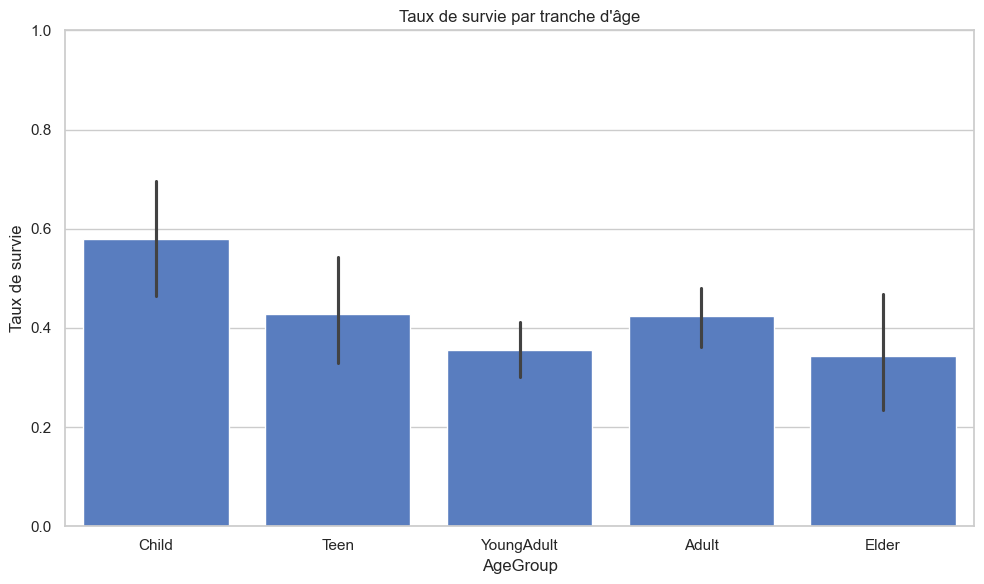

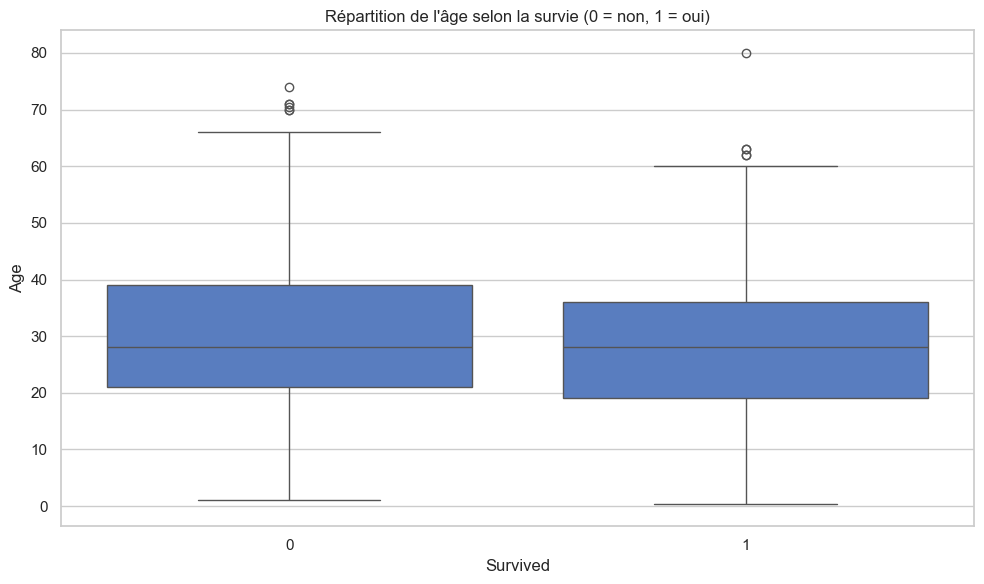

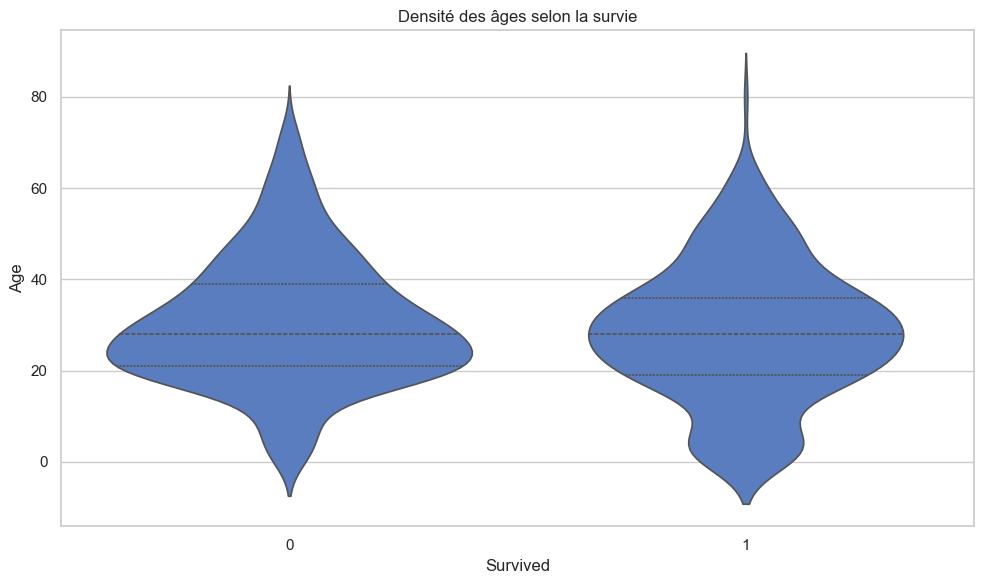

Taux de survie par classe et sexe:
 Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


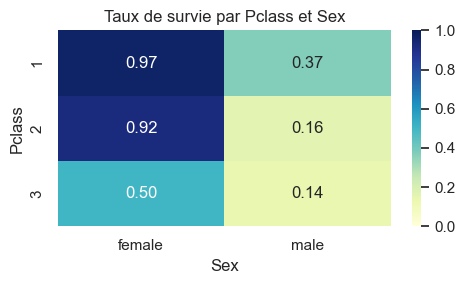

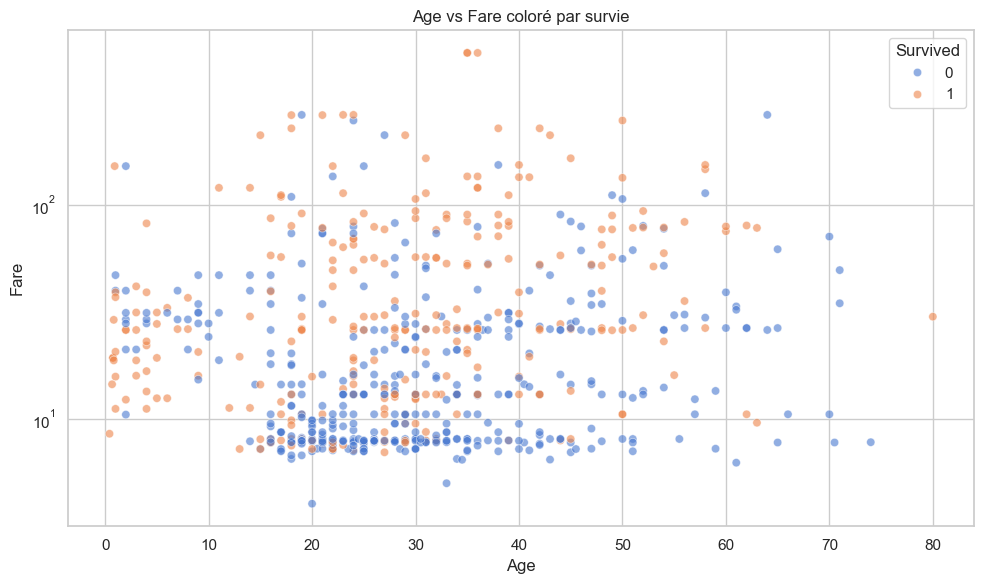

In [4]:
import seaborn as sns

# Visualisations pour explorer les corrélations entre Age, Sex, Pclass ... et la survie
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# 1) Corrélation entre variables numériques
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = train_df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Matrice de corrélation (numériques)")
plt.tight_layout()
plt.show()

# 2) Taux de survie par sexe
plt.figure()
sns.barplot(x='Sex', y='Survived', data=train_df, estimator=lambda x: x.mean())
plt.ylim(0,1)
plt.title("Taux de survie par sexe")
plt.ylabel("Taux de survie")
plt.tight_layout()
plt.show()

# 3) Taux de survie par classe
plt.figure()
sns.barplot(x='Pclass', y='Survived', data=train_df, estimator=lambda x: x.mean())
plt.ylim(0,1)
plt.title("Taux de survie par classe (Pclass)")
plt.ylabel("Taux de survie")
plt.tight_layout()
plt.show()

# 4) Créer des tranches d'âges et afficher le taux de survie par tranche
age_df = train_df.dropna(subset=['Age']).copy()
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Elder']
age_df['AgeGroup'] = pd.cut(age_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

plt.figure()
sns.barplot(x='AgeGroup', y='Survived', data=age_df, estimator=lambda x: x.mean(), order=age_labels)
plt.ylim(0,1)
plt.title("Taux de survie par tranche d'âge")
plt.ylabel("Taux de survie")
plt.tight_layout()
plt.show()

# 5) Distribution des âges selon survie (boxplot / violin)
plt.figure()
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Répartition de l'âge selon la survie (0 = non, 1 = oui)")
plt.tight_layout()
plt.show()

plt.figure()
sns.violinplot(x='Survived', y='Age', data=train_df, inner="quartile")
plt.title("Densité des âges selon la survie")
plt.tight_layout()
plt.show()

# 6) Interaction : sexe et classe (tableau + heatmap)
pivot_sex_class = train_df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print("Taux de survie par classe et sexe:\n", pivot_sex_class)

plt.figure(figsize=(5,3))
sns.heatmap(pivot_sex_class, annot=True, fmt=".2f", cmap='YlGnBu', vmin=0, vmax=1)
plt.title("Taux de survie par Pclass et Sex")
plt.tight_layout()
plt.show()

# 7) Optionnel : scatter Age vs Fare coloré par survie (pour repérer patterns)
plt.figure()
sns.scatterplot(data=train_df.dropna(subset=['Age','Fare']), x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.yscale('log')  # la distribution des tarifs est très étalée
plt.title("Age vs Fare coloré par survie")
plt.tight_layout()
plt.show()